In [16]:
def Update(accelaration , velocity):
    r = velocity + (1/2)*accelaration
    return r 

In [17]:
def Update_velocity(accelaration,velocity):
    velocity +=accelaration
    return velocity

In [34]:
import math
import numpy as np
import random

x1_coordinates = []
y1_coordinates = []

radius_g1 = 35
centre_x1 = 45
centre_y1 = 40

mass_g1 = []
x2_coordinates = []
y2_coordinates = []

radius_g2 = 35
centre_x2 = 125
centre_y2 = 150


mass_g2 = []
n = int(input("enter number of particles in the galaxy:"))


for _ in range(n):
    
    theta_1 = 2*math.pi*random.random()
    r1 = radius_g1*random.random()
    x1_coordinates.append(centre_x1 + r1*(math.cos(theta_1)))
    y1_coordinates.append(centre_y1 + r1*(math.sin(theta_1)))


    theta_2 = 2*math.pi*random.random()
    r2 = radius_g2*random.random()
    x2_coordinates.append(centre_x2 + r2*(math.cos(theta_2)))
    y2_coordinates.append(centre_y2 + r2*(math.sin(theta_2)))


total_mass1 = 0
total_mass2 = 0
for k in range(n):
    distance = abs(((x1_coordinates[k]-centre_x1)**2 +(y1_coordinates[k]- centre_y1)**2)**(1/2))
    a = np.pi/2
    angle = (distance/radius_g1)*a
    mass_g1.append(100*math.cos(angle))
    total_mass1 += mass_g1[k]
   

    distance = abs(((x2_coordinates[k]-centre_x2)**2 +(y2_coordinates[k]- centre_y2)**2)**(1/2))
    a = np.pi/2
    angle = (distance/radius_g2)*a
    mass_g2.append(100*math.cos(angle))
    total_mass2 +=mass_g2[k]

com_x = (total_mass1*centre_x1 + total_mass2*centre_x2)/(total_mass1 + total_mass2)
com_y = (total_mass1*centre_y1 + total_mass2*centre_y2)/(total_mass1 + total_mass2)


distance = ((centre_y2 -centre_y1)**2 + (centre_x2 - centre_x1)**2)**(1/2)


enter number of particles in the galaxy:200


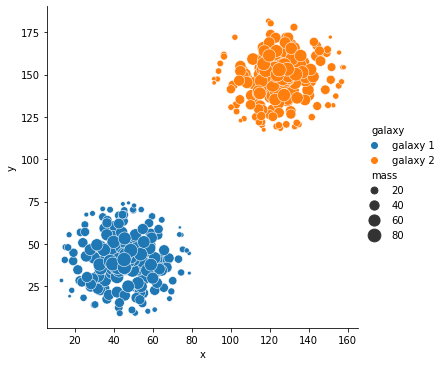

In [35]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

with open('particles.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['x','y','mass','galaxy'])

    for k in range(n):
        writer.writerow([x1_coordinates[k], y1_coordinates[k], mass_g1[k], 'galaxy 1'])
    for j in range(n):
        writer.writerow([x2_coordinates[j], y2_coordinates[j], mass_g2[j], 'galaxy 2'])

df = pd.read_csv('particles.csv')

galaxy = sns.relplot(data = df,x = "x",y = 'y',hue = 'galaxy',size = 'mass',sizes = (10,200))
plt.show()

<Figure size 1440x1440 with 0 Axes>

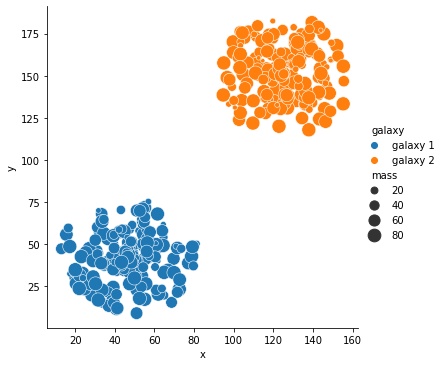

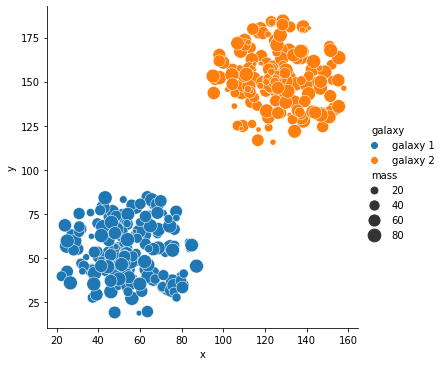

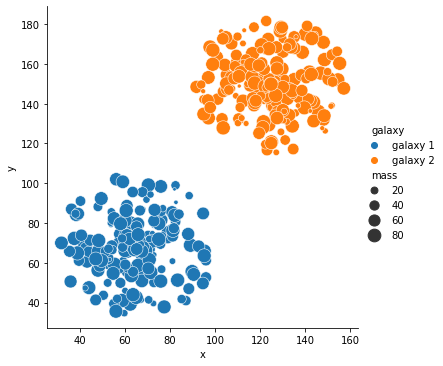

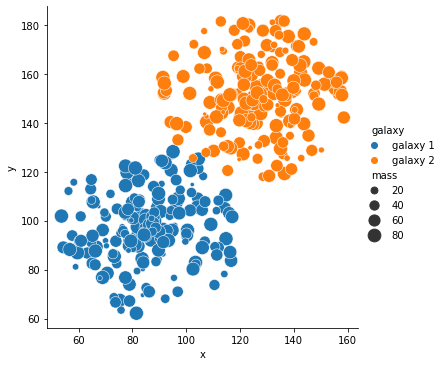

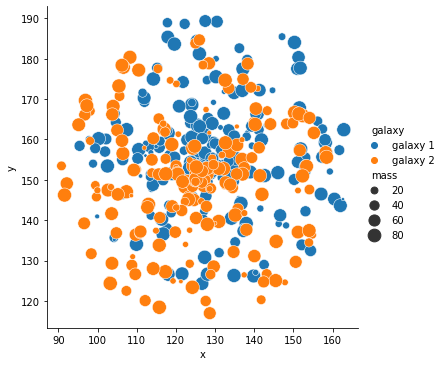

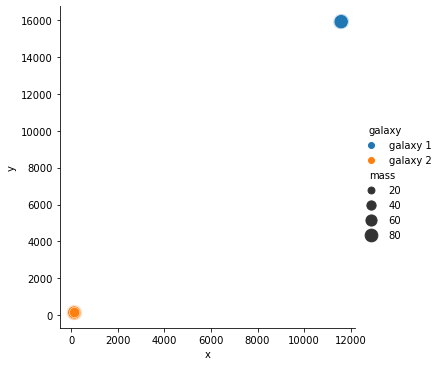

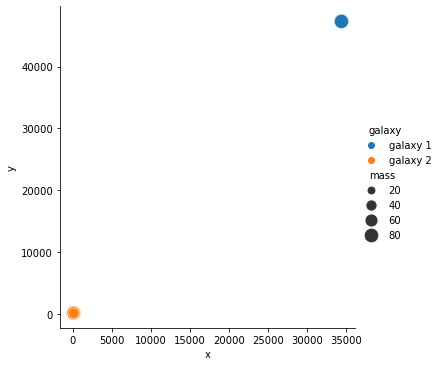

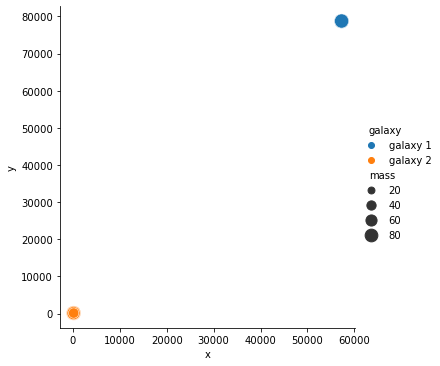

In [36]:
import csv

velocity_g1x = 0
velocity_g1y = 0
velocity_g2x = 0
velocity_g2y = 0
centrex1 = centre_x1
centrex2 = centre_x2
centrey1 = centre_y1
centrey2 = centre_y2

plt.figure(figsize = (20,20))
for i in range(8):

    distance = ((centrey2 -centrey1)**2 + (centrex2 - centrex1)**2)**(1/2)
    force = 10*(total_mass1)*(total_mass2)/(distance)**2
    accelaration_g1 = force/total_mass1
    accelaration_g1x = accelaration_g1*(centre_x2 - centre_x1)/distance
    accelaration_g1y = accelaration_g1*(centre_y2 - centre_y1)/distance

    centrex1 += Update(accelaration_g1x, velocity_g1x )
    centrey1 += Update(accelaration_g1y, velocity_g1y )

    velocity_g1x = Update_velocity(accelaration_g1x, velocity_g1x)
    velocity_g1y = Update_velocity(accelaration_g1y, velocity_g1y)



    accelaration_g2 = force/total_mass2
    accelaration_g1x = accelaration_g2*(centrex2 - centrex1)/distance
    accelaration_g1y = accelaration_g2*(centrey2 - centrey1)/distance

    centrex2 += Update(accelaration_g2x, velocity_g2x )
    centrey2 += Update(accelaration_g2y, velocity_g2y )

    velocity_g2x = Update_velocity(accelaration_g2x, velocity_g2x)
    velocity_g2y = Update_velocity(accelaration_g2y, velocity_g2y)


    for k in range(n):

        theta_1 = 2*math.pi*random.random()
        r1 = radius_g1*random.random()
        x1_coordinates[k] = centrex1 + r1*(math.cos(theta_1))
        y1_coordinates[k] = centrey1 + r1*(math.sin(theta_1))


        theta_2 = 2*math.pi*random.random()
        r2 = radius_g2*random.random()
        x2_coordinates[k] = centrex2 + r2*(math.cos(theta_2))
        y2_coordinates[k] = centrey2 + r2*(math.sin(theta_2))

    with open('particles.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['x','y','mass','galaxy'])

        for k in range(n):
            writer.writerow([x1_coordinates[k], y1_coordinates[k], mass_g1[k], 'galaxy 1'])
        for j in range(n):
            writer.writerow([x2_coordinates[j], y2_coordinates[j], mass_g2[j], 'galaxy 2'])

    df = pd.read_csv('particles.csv')

    sns.relplot(data = df,x = "x",y = 'y',hue = 'galaxy',size = 'mass',sizes = (10,200))
    plt.show()
